"I solemnly swear that I am up to no good" when I shortcut Calculus with SymPy. But I'm surprised by how useful it is in recruitment / HR analytics.

This is how I got sidetracked when Dr. Joseph W. Cutrone in his Coursera class asked to find the equation of the tangent line to the curve $y=3e^x+x$ at the point where $x=0$. More on that later.

We'll need to start by pulling Euler's number $e$ from SymPy.

In [2]:
import sympy as sp
from sympy import symbols, diff, simplify

x = symbols('x')

y = 3*sp.exp(x)+x

derivative = diff(y,x)

print("Derivative is",derivative)

slope = derivative.subs(x,0)

print("Slope is", slope, "at x=0")

y1 = y.subs(x,0)

tangent_line = slope*(x-0)+y1

tangent_line = simplify(tangent_line)

print("Tangent line is y =", tangent_line)


Derivative is 3*exp(x) + 1
Slope is 4 at x=0
Tangent line is y = 4*x + 3


To graphically show that $y=4x+3$ is the tangent line to the curve $y=3e^x+x$ at the point where $x=0$, we'll use good old matplotlib and NumPy.

In [3]:
import numpy as np

import matplotlib.pyplot as plt

NumPy doesn't read Euler notations the same way as SymPy so we'll need to lambdify everything.

In [4]:
curve = sp.lambdify(x, y, modules=['numpy'])

tangent = sp.lambdify(x, tangent_line, modules=['numpy'])

On the x-axis, we'll show the figure between $x=-5$ and $x=5$ with 1000 points.

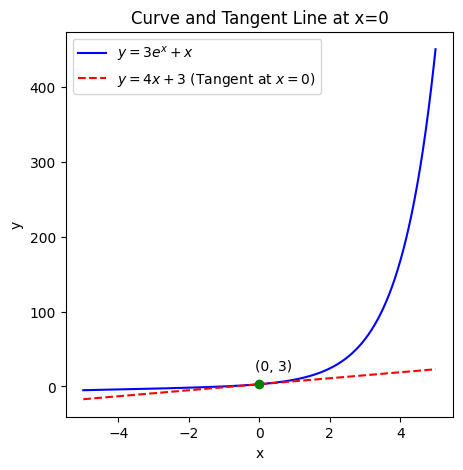

In [5]:
x_vals = np.linspace(-5, 5, 1000)  

y_curve_vals = curve(x_vals)    

y_tangent_vals = tangent(x_vals) 

plt.figure(figsize=(5, 5))

#Curve
plt.plot(x_vals, y_curve_vals, label=r'$y = 3e^x + x$', color='blue')

#Tangent line
plt.plot(x_vals, y_tangent_vals, label=r'$y = 4x + 3$ (Tangent at $x=0$)', color='red', linestyle='--')

#Mark tangent point (0, 3)
plt.scatter(0, 3, color='green', zorder=5)
plt.annotate('(0, 3)', (0, 3), textcoords="offset points", xytext=(10,10), ha='center')

#Add labels and legend
plt.xlabel('x')
plt.ylabel('y')
plt.title('Curve and Tangent Line at x=0')
plt.legend()
plt.show()

Now putting my recruiter hat back on, why does this matter in real life? Well, suppose we want to know how many hires our talent acquisition team is placing per month, just for metrics and workforce planning purposes. In a perfect world, the hiring rate (aka hires per month) would be linear and we'll just have a much easier calculation with a straight blue line like finding $m$ in $y=mx+b$

But in today's world, hiring can be slow, like during the holidays and then suddenly pick up exponentially in January when budgets just get approved and stakeholders (hiring managers, interviewers, compensation team, HRBP, etc.) are back from vacation. Hence the blue curve.


Suppose that x represents the month of the year and y represents the number of hires made. Hypothetically speaking, if $x=1$ instead of $x=0$ to represent the 1st month in our metric period, January, we can use the tangent line equation to calculate the estimated hiring rate in January.

If I actually solved for the slope (hiring rate) at $x=1$:



In [6]:
slope = derivative.subs(x,1)

print("Slope is", slope, "at x=1")

Slope is 1 + 3*E at x=1


But I wouldn't want to tell the executives that we're making $1+3^e$ hires per month, so we'll convert this into a float rounded to the nearest whole number.

In [8]:
print(derivative.subs(x,1).evalf(1))

9.


Therefore in January, our talent acquisition team picked up more volume and made about 9 hires a month. 

"Mischief managed."